### Install liblarires

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


### Load data

In [2]:
laned_data = pandas.read_csv('5270app.csv')

laned_data.head()

,Time_AEST,Detector_ID,Volume,Occupancy,Speed
0,1/05/2021 0:00,5270-VD01,1,0.4,79.0
1,1/05/2021 0:01,5270-VD01,0,0.0,NaN
2,1/05/2021 0:02,5270-VD01,0,0.0,NaN
3,1/05/2021 0:03,5270-VD01,1,0.3,100.0
4,1/05/2021 0:04,5270-VD01,0,0.1,NaN


In [3]:
# replace nan values with Zero

laned_data['Speed'] = laned_data['Speed'].replace(np.nan, 0)

laned_data.head()

,Time_AEST,Detector_ID,Volume,Occupancy,Speed
0,1/05/2021 0:00,5270-VD01,1,0.4,79.0
1,1/05/2021 0:01,5270-VD01,0,0.0,0.0
2,1/05/2021 0:02,5270-VD01,0,0.0,0.0
3,1/05/2021 0:03,5270-VD01,1,0.3,100.0
4,1/05/2021 0:04,5270-VD01,0,0.1,0.0


In [4]:
# parsing dates
laned_data['Time_AEST'] = pandas.to_datetime(laned_data['Time_AEST'])

laned_data.dtypes

Time_AEST      datetime64[ns]
Detector_ID            object
Volume                  int64
Occupancy             float64
Speed                 float64
dtype: object

In [5]:
laned_data.dtypes

Time_AEST      datetime64[ns]
Detector_ID            object
Volume                  int64
Occupancy             float64
Speed                 float64
dtype: object

In [6]:
laned_data.head()

,Time_AEST,Detector_ID,Volume,Occupancy,Speed
0,2021-01-05 00:00:00,5270-VD01,1,0.4,79.0
1,2021-01-05 00:01:00,5270-VD01,0,0.0,0.0
2,2021-01-05 00:02:00,5270-VD01,0,0.0,0.0
3,2021-01-05 00:03:00,5270-VD01,1,0.3,100.0
4,2021-01-05 00:04:00,5270-VD01,0,0.1,0.0


In [7]:
def harmonic_mean_speed(group) :
    a = 0
    b = 0
    for i, j in zip(list(group['Volume']), list(group['Speed'])):
        a += i * j 
        b += i
    if b != 0:
        return a / b
    return 0
    

### Determine volume weighted harmonic mean speed for each lane (detector)

In [8]:
laned_data.groupby('Detector_ID').apply(harmonic_mean_speed)

Detector_ID
5270-VD01    71.933175
5270-VD03    85.093752
5270-VD05    91.193914
5270-VD07    92.608286
dtype: float64

### Combine lines into one row for each time point

In [9]:
def combine_lanes(group):
    return pandas.Series([group.Volume.mean(), group.Occupancy.mean(), harmonic_mean_speed(group)], index = ['Volume', 'Occupancy', 'Speed'])

combined_lanes = laned_data.groupby('Time_AEST').apply(combine_lanes)
combined_lanes

,Volume,Occupancy,Speed
Time_AEST,,,
2021-01-05 00:00:00,3.00,1.250,93.833333
2021-01-05 00:01:00,4.50,1.850,94.333333
2021-01-05 00:02:00,4.75,2.425,95.684211
2021-01-05 00:03:00,3.50,1.750,97.785714
2021-01-05 00:04:00,1.50,0.750,98.833333
...,...,...,...
2021-12-06 23:55:00,4.50,1.750,97.222222
2021-12-06 23:56:00,4.25,1.700,95.647059
2021-12-06 23:57:00,3.50,1.450,99.357143


### Analyse 2nd Week (2021-05-10 to 2021-05-16)

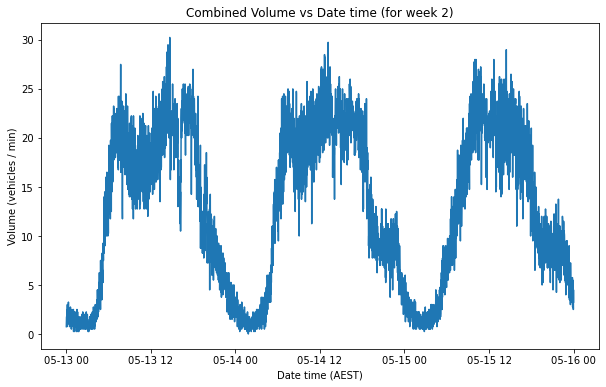

In [10]:
f = combined_lanes.iloc[combined_lanes.index >= '2021-05-10 00:00:00', :]
h = f.iloc[f.index <= '2021-05-16 00:00:00', :]

plt.figure(figsize = (10, 6))
plt.plot(h.index, h.Volume)
plt.title('Combined Volume vs Date time (for week 2)')
plt.ylabel('Volume (vehicles / min)')
plt.xlabel('Date time (AEST)')
plt.show()

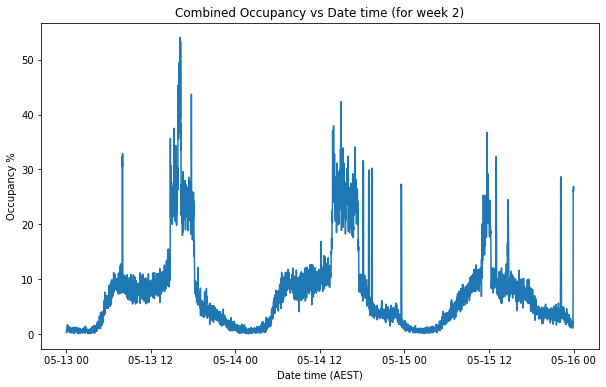

In [11]:
f = combined_lanes.iloc[combined_lanes.index >= '2021-05-10 00:00:00', :]
h = f.iloc[f.index <= '2021-05-16 00:00:00', :]

plt.figure(figsize = (10, 6))
plt.plot(h.index, h.Occupancy)
plt.title('Combined Occupancy vs Date time (for week 2)')
plt.ylabel('Occupancy %')
plt.xlabel('Date time (AEST)')
plt.show()

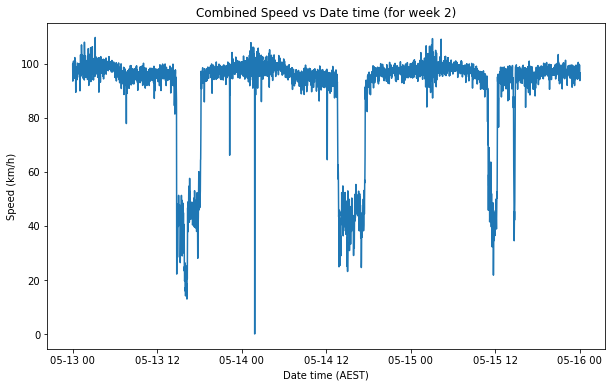

In [12]:
f = combined_lanes.iloc[combined_lanes.index >= '2021-05-10 00:00:00', :]
h = f.iloc[f.index <= '2021-05-16 00:00:00', :]

plt.figure(figsize = (10, 6))
plt.plot(h.index, h.Speed)
plt.title('Combined Speed vs Date time (for week 2)')
plt.ylabel('Speed (km/h)')
plt.xlabel('Date time (AEST)')
plt.show()

### Analyse by Day of Week

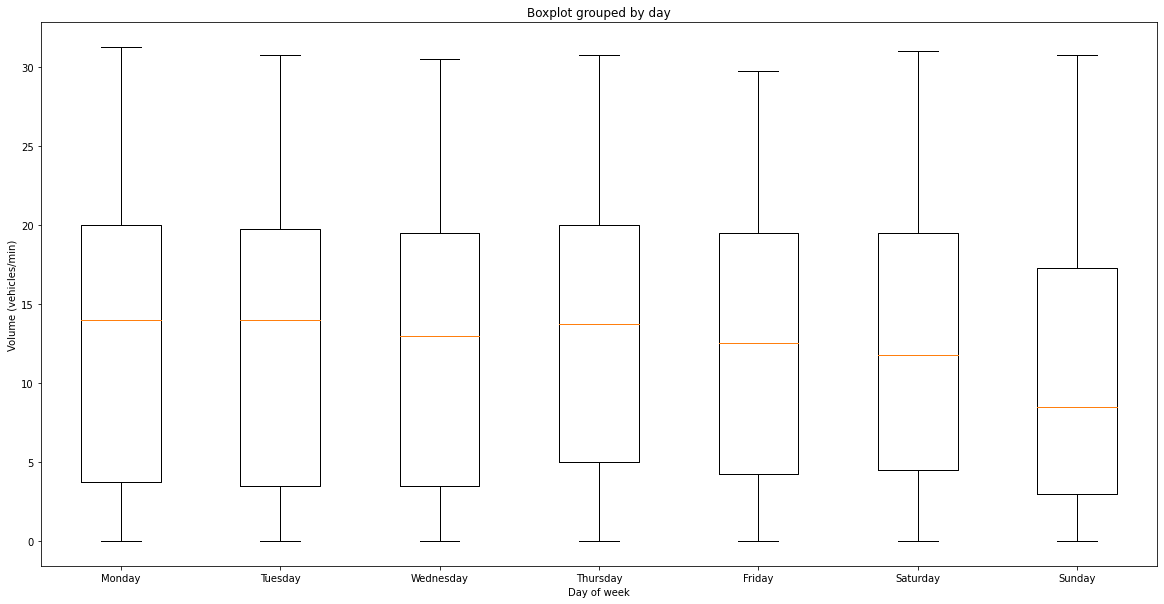

In [13]:
from datetime import datetime

box_dict = {
'Monday' : [combined_lanes.loc[i, 'Volume'] for i in combined_lanes.index if i.strftime('%A') == 'Monday'],
'Tuesday' : [combined_lanes.loc[i, 'Volume'] for i in combined_lanes.index if i.strftime('%A') == 'Tuesday'],
'Wednesday' : [combined_lanes.loc[i, 'Volume'] for i in combined_lanes.index if i.strftime('%A') == 'Wednesday'],
'Thursday' : [combined_lanes.loc[i, 'Volume'] for i in combined_lanes.index if i.strftime('%A') == 'Thursday'],
'Friday' : [combined_lanes.loc[i, 'Volume'] for i in combined_lanes.index if i.strftime('%A') == 'Friday'],
'Saturday' : [combined_lanes.loc[i, 'Volume'] for i in combined_lanes.index if i.strftime('%A') == 'Saturday'],
'Sunday' : [combined_lanes.loc[i, 'Volume'] for i in combined_lanes.index if i.strftime('%A') == 'Sunday']}

fig, ax = plt.subplots(figsize = (20, 10))
ax.boxplot(box_dict.values())
ax.set_xticklabels(box_dict.keys())
plt.title('Boxplot grouped by day')
plt.xlabel('Day of week')
plt.ylabel('Volume (vehicles/min)')
plt.show()

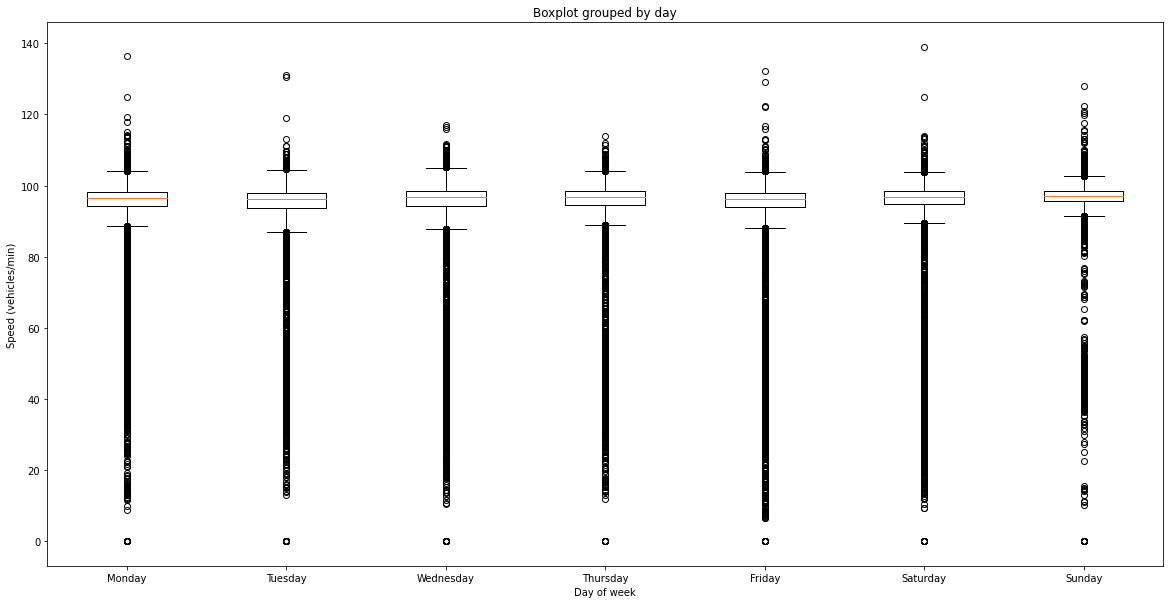

In [14]:

box_dict = {
'Monday' : [combined_lanes.loc[i, 'Speed'] for i in combined_lanes.index if i.strftime('%A') == 'Monday'],
'Tuesday' : [combined_lanes.loc[i, 'Speed'] for i in combined_lanes.index if i.strftime('%A') == 'Tuesday'],
'Wednesday' : [combined_lanes.loc[i, 'Speed'] for i in combined_lanes.index if i.strftime('%A') == 'Wednesday'],
'Thursday' : [combined_lanes.loc[i, 'Speed'] for i in combined_lanes.index if i.strftime('%A') == 'Thursday'],
'Friday' : [combined_lanes.loc[i, 'Speed'] for i in combined_lanes.index if i.strftime('%A') == 'Friday'],
'Saturday' : [combined_lanes.loc[i, 'Speed'] for i in combined_lanes.index if i.strftime('%A') == 'Saturday'],
'Sunday' : [combined_lanes.loc[i, 'Speed'] for i in combined_lanes.index if i.strftime('%A') == 'Sunday']}

fig, ax = plt.subplots(figsize = (20, 10))
ax.boxplot(box_dict.values())
ax.set_xticklabels(box_dict.keys())
plt.title('Boxplot grouped by day')
plt.xlabel('Day of week')
plt.ylabel('Speed (vehicles/min)')
plt.show()

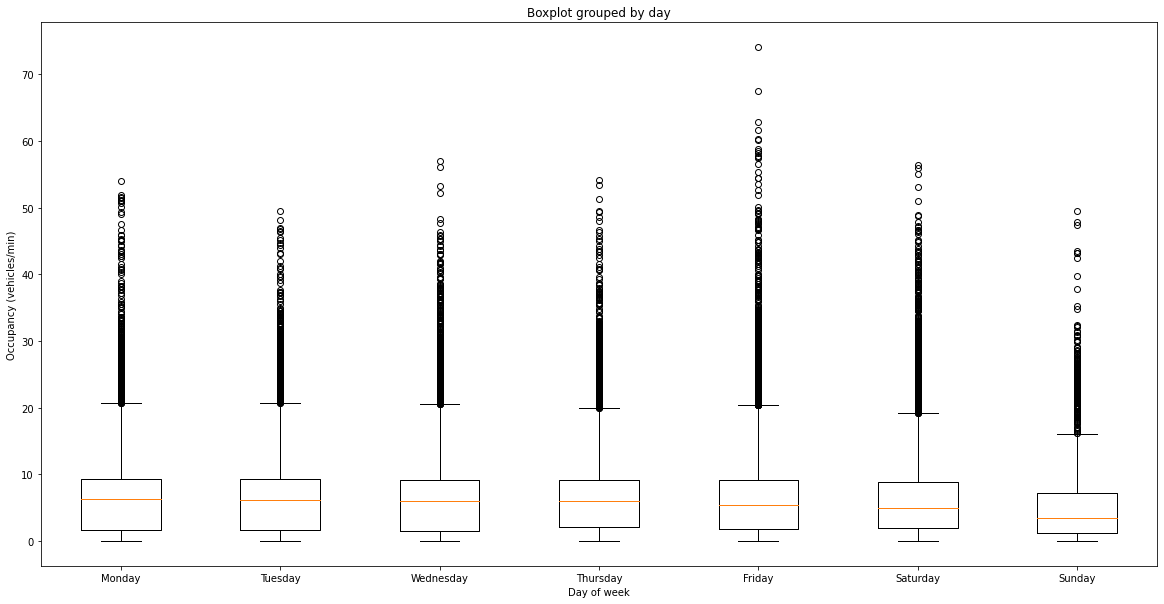

In [15]:
box_dict = {
'Monday' : [combined_lanes.loc[i, 'Occupancy'] for i in combined_lanes.index if i.strftime('%A') == 'Monday'],
'Tuesday' : [combined_lanes.loc[i, 'Occupancy'] for i in combined_lanes.index if i.strftime('%A') == 'Tuesday'],
'Wednesday' : [combined_lanes.loc[i, 'Occupancy'] for i in combined_lanes.index if i.strftime('%A') == 'Wednesday'],
'Thursday' : [combined_lanes.loc[i, 'Occupancy'] for i in combined_lanes.index if i.strftime('%A') == 'Thursday'],
'Friday' : [combined_lanes.loc[i, 'Occupancy'] for i in combined_lanes.index if i.strftime('%A') == 'Friday'],
'Saturday' : [combined_lanes.loc[i, 'Occupancy'] for i in combined_lanes.index if i.strftime('%A') == 'Saturday'],
'Sunday' : [combined_lanes.loc[i, 'Occupancy'] for i in combined_lanes.index if i.strftime('%A') == 'Sunday']}

fig, ax = plt.subplots(figsize = (20, 10))
ax.boxplot(box_dict.values())
ax.set_xticklabels(box_dict.keys())
plt.title('Boxplot grouped by day')
plt.xlabel('Day of week')
plt.ylabel('Occupancy (vehicles/min)')
plt.show()

### Analyse by Hour of day

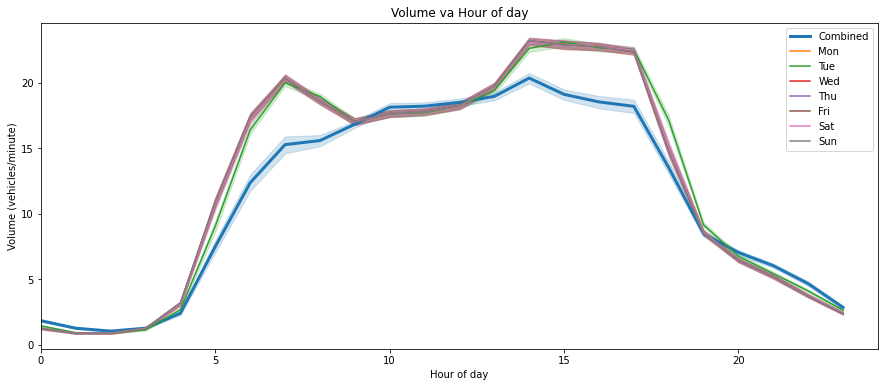

In [16]:
plt.figure(figsize = (15, 6))
sns.color_palette("tab10")
sns.lineplot(x = [i.hour for i in combined_lanes.index][:10080], y = [combined_lanes.loc[i, 'Volume'] for i in combined_lanes.index][:10080], label = 'Combined', linewidth = 3)
sns.lineplot(x = [i.hour for i in combined_lanes.index if i.strftime('%A') == 'Monday'][:10080], y = [combined_lanes.loc[i, 'Volume'] for i in combined_lanes.index if i.strftime('%A') == 'Monday'][:10080], label = 'Mon')
sns.lineplot(x = [i.hour for i in combined_lanes.index if i.strftime('%A') == 'Tuesday'][:10080], y = [combined_lanes.loc[i, 'Volume'] for i in combined_lanes.index if i.strftime('%A') == 'Monday'][:10080], label = 'Tue')
sns.lineplot(x = [i.hour for i in combined_lanes.index if i.strftime('%A') == 'Wednesday'][:10080], y = [combined_lanes.loc[i, 'Volume'] for i in combined_lanes.index if i.strftime('%A') == 'Monday'][:10080], label = 'Wed')
sns.lineplot(x = [i.hour for i in combined_lanes.index if i.strftime('%A') == 'Thursday'][:10080], y = [combined_lanes.loc[i, 'Volume'] for i in combined_lanes.index if i.strftime('%A') == 'Monday'][:10080], label = 'Thu')
sns.lineplot(x = [i.hour for i in combined_lanes.index if i.strftime('%A') == 'Friday'][:10080], y = [combined_lanes.loc[i, 'Volume'] for i in combined_lanes.index if i.strftime('%A') == 'Monday'][:10080], label = 'Fri')
sns.lineplot(x = [i.hour for i in combined_lanes.index if i.strftime('%A') == 'Saturday'][:10080], y = [combined_lanes.loc[i, 'Volume'] for i in combined_lanes.index if i.strftime('%A') == 'Monday'][:10080], label = 'Sat')
sns.lineplot(x = [i.hour for i in combined_lanes.index if i.strftime('%A') == 'Sunday'][:10080], y = [combined_lanes.loc[i, 'Volume'] for i in combined_lanes.index if i.strftime('%A') == 'Monday'][:10080], label = 'Sun')
plt.xlim(0, 24)
plt.xlabel('Hour of day')
plt.ylabel('Volume (vehicles/minute)')
plt.title('Volume va Hour of day')
plt.legend(loc = 'upper right')
plt.show()




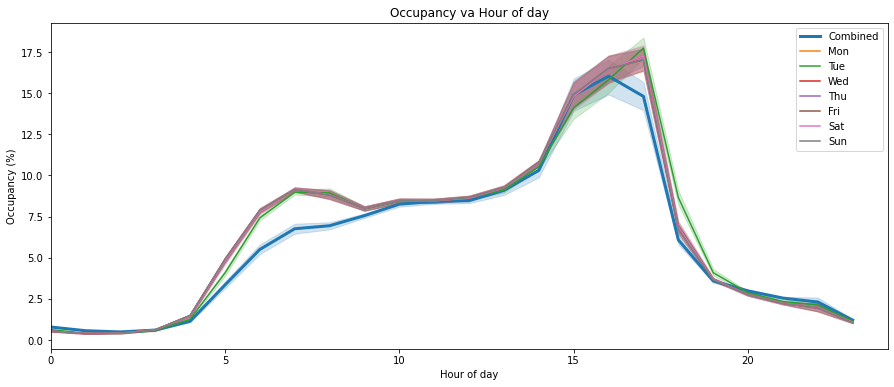

In [17]:
plt.figure(figsize = (15, 6))
sns.color_palette("tab10")
sns.lineplot(x = [i.hour for i in combined_lanes.index][:10080], y = [combined_lanes.loc[i, 'Occupancy'] for i in combined_lanes.index][:10080], label = 'Combined', linewidth = 3)
sns.lineplot(x = [i.hour for i in combined_lanes.index if i.strftime('%A') == 'Monday'][:10080], y = [combined_lanes.loc[i, 'Occupancy'] for i in combined_lanes.index if i.strftime('%A') == 'Monday'][:10080], label = 'Mon')
sns.lineplot(x = [i.hour for i in combined_lanes.index if i.strftime('%A') == 'Tuesday'][:10080], y = [combined_lanes.loc[i, 'Occupancy'] for i in combined_lanes.index if i.strftime('%A') == 'Monday'][:10080], label = 'Tue')
sns.lineplot(x = [i.hour for i in combined_lanes.index if i.strftime('%A') == 'Wednesday'][:10080], y = [combined_lanes.loc[i, 'Occupancy'] for i in combined_lanes.index if i.strftime('%A') == 'Monday'][:10080], label = 'Wed')
sns.lineplot(x = [i.hour for i in combined_lanes.index if i.strftime('%A') == 'Thursday'][:10080], y = [combined_lanes.loc[i, 'Occupancy'] for i in combined_lanes.index if i.strftime('%A') == 'Monday'][:10080], label = 'Thu')
sns.lineplot(x = [i.hour for i in combined_lanes.index if i.strftime('%A') == 'Friday'][:10080], y = [combined_lanes.loc[i, 'Occupancy'] for i in combined_lanes.index if i.strftime('%A') == 'Monday'][:10080], label = 'Fri')
sns.lineplot(x = [i.hour for i in combined_lanes.index if i.strftime('%A') == 'Saturday'][:10080], y = [combined_lanes.loc[i, 'Occupancy'] for i in combined_lanes.index if i.strftime('%A') == 'Monday'][:10080], label = 'Sat')
sns.lineplot(x = [i.hour for i in combined_lanes.index if i.strftime('%A') == 'Sunday'][:10080], y = [combined_lanes.loc[i, 'Occupancy'] for i in combined_lanes.index if i.strftime('%A') == 'Monday'][:10080], label = 'Sun')
plt.xlim(0, 24)
plt.xlabel('Hour of day')
plt.ylabel('Occupancy (%)')
plt.title('Occupancy va Hour of day')
plt.legend(loc = 'upper right')
plt.show()




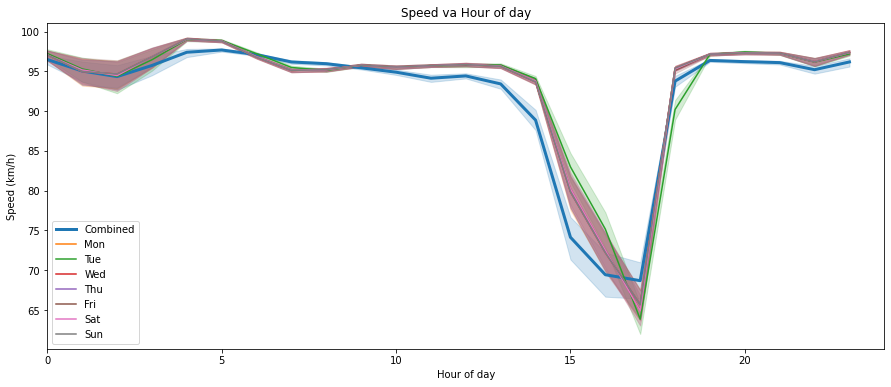

In [18]:
plt.figure(figsize = (15, 6))
sns.color_palette("Paired")
sns.lineplot(x = [i.hour for i in combined_lanes.index][:10080], y = [combined_lanes.loc[i, 'Speed'] for i in combined_lanes.index][:10080], label = 'Combined', linewidth = 3)
sns.lineplot(x = [i.hour for i in combined_lanes.index if i.strftime('%A') == 'Monday'][:10080], y = [combined_lanes.loc[i, 'Speed'] for i in combined_lanes.index if i.strftime('%A') == 'Monday'][:10080], label = 'Mon')
sns.lineplot(x = [i.hour for i in combined_lanes.index if i.strftime('%A') == 'Tuesday'][:10080], y = [combined_lanes.loc[i, 'Speed'] for i in combined_lanes.index if i.strftime('%A') == 'Monday'][:10080], label = 'Tue')
sns.lineplot(x = [i.hour for i in combined_lanes.index if i.strftime('%A') == 'Wednesday'][:10080], y = [combined_lanes.loc[i, 'Speed'] for i in combined_lanes.index if i.strftime('%A') == 'Monday'][:10080], label = 'Wed')
sns.lineplot(x = [i.hour for i in combined_lanes.index if i.strftime('%A') == 'Thursday'][:10080], y = [combined_lanes.loc[i, 'Speed'] for i in combined_lanes.index if i.strftime('%A') == 'Monday'][:10080], label = 'Thu')
sns.lineplot(x = [i.hour for i in combined_lanes.index if i.strftime('%A') == 'Friday'][:10080], y = [combined_lanes.loc[i, 'Speed'] for i in combined_lanes.index if i.strftime('%A') == 'Monday'][:10080], label = 'Fri')
sns.lineplot(x = [i.hour for i in combined_lanes.index if i.strftime('%A') == 'Saturday'][:10080], y = [combined_lanes.loc[i, 'Speed'] for i in combined_lanes.index if i.strftime('%A') == 'Monday'][:10080], label = 'Sat')
sns.lineplot(x = [i.hour for i in combined_lanes.index if i.strftime('%A') == 'Sunday'][:10080], y = [combined_lanes.loc[i, 'Speed'] for i in combined_lanes.index if i.strftime('%A') == 'Monday'][:10080], label = 'Sun')
plt.xlim(0, 24)
plt.xlabel('Hour of day')
plt.ylabel('Speed (km/h)')
plt.title('Speed va Hour of day')
plt.legend(loc = 'lower left')
plt.show()




### Analyse relationship between variables

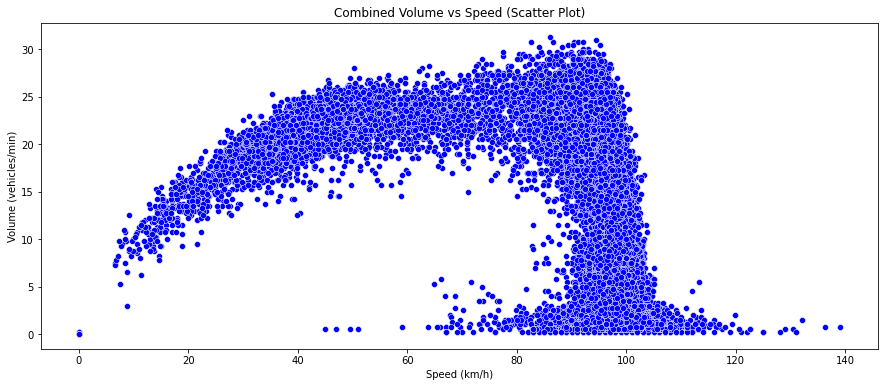

In [19]:
plt.figure(figsize = (15, 6))
sns.scatterplot(x = combined_lanes.Speed, y = combined_lanes.Volume, color = 'blue', marker = 'o')
plt.ylabel('Volume (vehicles/min)')
plt.xlabel('Speed (km/h)')
plt.title('Combined Volume vs Speed (Scatter Plot)')
plt.show()

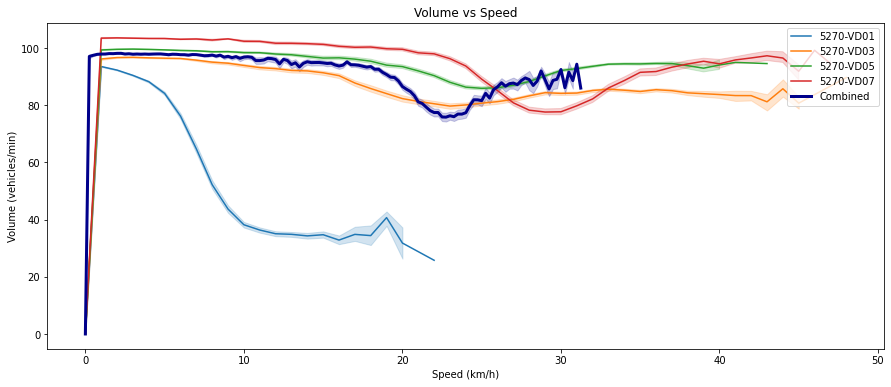

In [20]:
plt.figure(figsize = (15, 6))
sns.lineplot(data = laned_data, x = "Volume", y = "Speed", hue="Detector_ID")
sns.lineplot(data = combined_lanes, x = "Volume", y = "Speed", label = 'Combined', linewidth = 3, color = 'darkblue')
plt.ylabel('Volume (vehicles/min)')
plt.xlabel('Speed (km/h)')
plt.title('Volume vs Speed')
plt.legend()
plt.legend(loc = 'upper right')
plt.show()

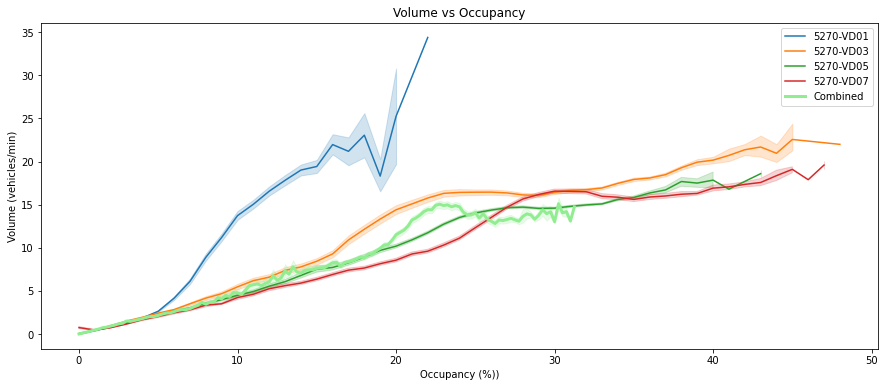

In [21]:
plt.figure(figsize = (15, 6))
sns.lineplot(data = laned_data, x = "Volume", y = "Occupancy", hue="Detector_ID")
sns.lineplot(data = combined_lanes, x = "Volume", y = "Occupancy", label = 'Combined', linewidth = 3, color = 'lightgreen')
plt.ylabel('Volume (vehicles/min)')
plt.xlabel('Occupancy (%))')
plt.title('Volume vs Occupancy')
plt.legend()
plt.legend(loc = 'upper right')
plt.show()

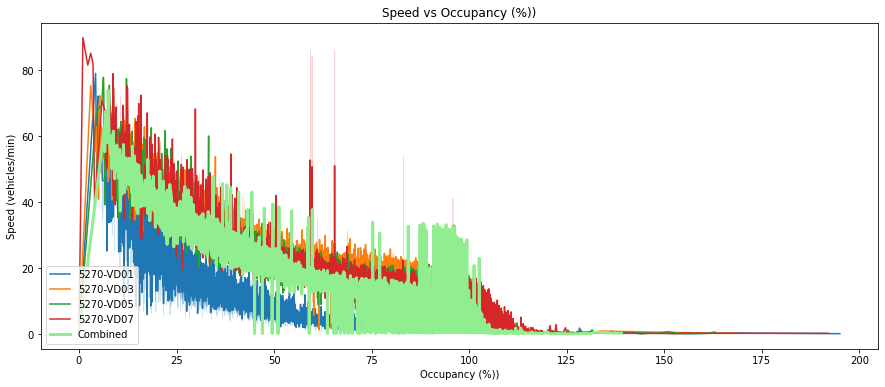

In [22]:
plt.figure(figsize = (15, 6))
sns.lineplot(data = laned_data, x = "Speed", y = "Occupancy", hue="Detector_ID")
sns.lineplot(data = combined_lanes, x = "Speed", y = "Occupancy", label = 'Combined', linewidth = 3, color = 'lightgreen')
plt.ylabel('Speed (vehicles/min)')
plt.xlabel('Occupancy (%))')
plt.title('Speed vs Occupancy (%))')
plt.legend()
plt.legend(loc = 'lower left')
plt.show()